In [1]:
import pandas as pd

census_data = pd.read_csv(r"C:\Users\Emil\Desktop\County election prediction 2024\PROJECT.csv")
X = census_data.iloc[:, 1:-1]  # All rows, all columns except the first and last
y = census_data.iloc[:, -1]   # All rows, only last column

Fitting The Classifier Model

In [2]:
from sklearn.ensemble import RandomForestClassifier

rf_classification_model = RandomForestClassifier(n_estimators=100, oob_score=True,random_state=42)

rf_classification_model.fit(X, y)

RandomForestClassifier(oob_score=True, random_state=42)

Plotting Feature Importance

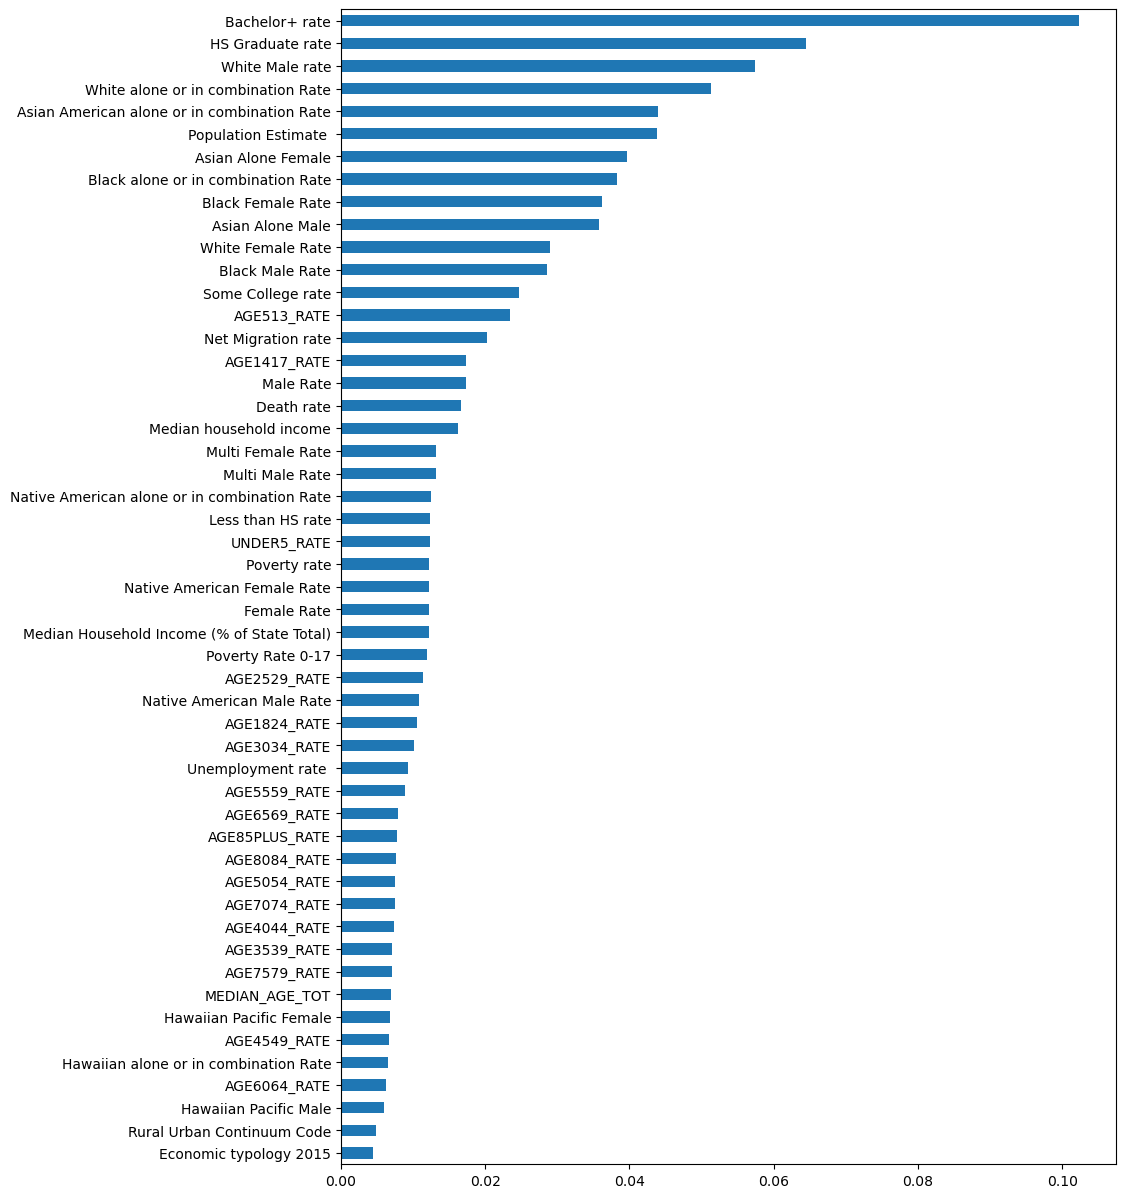

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances = pd.Series(rf_classification_model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(10,15));

Finding the optimal number of trees:


30 trees
roc: 0.951032297432079

50 trees
roc: 0.9532323911261

100 trees
roc: 0.9537379481692877

200 trees
roc: 0.9552461287388819

500 trees
roc: 0.9555015280394537

1000 trees
roc: 0.9555758898787674

2000 trees
roc: 0.9562344217439819



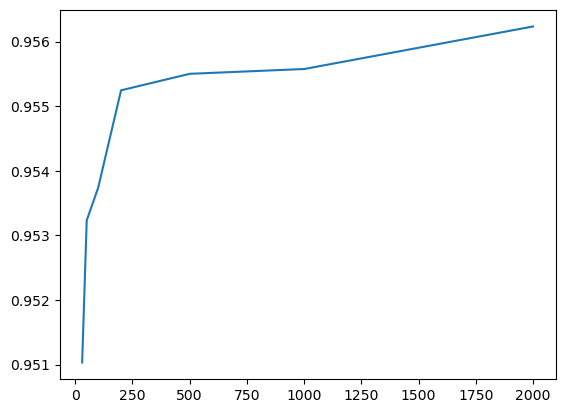

In [6]:
from sklearn.model_selection import cross_val_score

results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    rf_classification_model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=42)
    rf_classification_model.fit(X, y)
    print(trees, "trees")
    scores = cross_val_score(rf_classification_model, X, y, cv=10, scoring='roc_auc')
    roc = scores.mean()
    print("roc:", roc)
    results.append(roc)
    print("")

pd.Series(results, n_estimator_options).plot();

Finding the optimal number of features to consider when looking for the best split


c:\Users\Emil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


auto option


c:\Users\Emil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Emil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Emil\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

ROC AUC: 0.9293741785461531
None option
ROC AUC: 0.9249145687999192
sqrt option
ROC AUC: 0.9293741785461531
log2 option
ROC AUC: 0.9281013042159539
0.9 option
ROC AUC: 0.926505914467698
0.2 option
ROC AUC: 0.9293741785461531


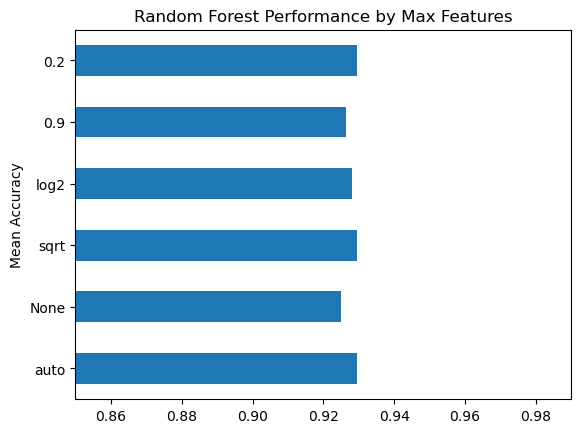

In [ ]:
from sklearn.model_selection import cross_val_score

results = []
max_feature_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_feature_options:
    rf_classifier_model = RandomForestClassifier(
        n_estimators=2000,
        oob_score=True,
        n_jobs=-1,
        random_state=42,
        max_features=max_features
    )
    rf_classifier_model.fit(X, y)
    print(max_features, "option")  # Now this will work
    scores = cross_val_score(rf_classifier_model, X, y, cv=10, scoring='accuracy')
    roc = scores.mean()
    print("ROC AUC:", roc)  # Fixed print statement
    results.append(roc)

# Plot results
pd.Series(results, index=max_feature_options).plot(
    kind="barh",
    xlim=(.85, .99),
    title="Random Forest Performance by Max Features",
    xlabel="Mean Accuracy"
)
plt.show()

Evaluate models based on accuracy and ROC AUC score:


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores.mean()) #0.9090041451824892

0.9090041451824892


c:\Users\Emil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Emil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print(scores.mean()) #0.9090041451824892

0.9161535441428705


c:\Users\Emil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Emil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

K-nearest neighbors:


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 10-fold cross-validation with K=21 for KNN
knn = KNeighborsClassifier(n_neighbors=21, leaf_size=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores.mean()) #0.8756030735011627

0.8756030735011627


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# 10-fold cross-validation with K=21 for KNN
knn = KNeighborsClassifier(n_neighbors=21, leaf_size=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='roc_auc')

print(scores.mean()) #0.8756030735011627

0.8124589199093697


Random forest classifier:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


rf_class_model = RandomForestClassifier(n_estimators = 2000,
                             oob_score = True,
                             n_jobs = -1,
                             random_state=42,
                             max_features = 0.2,
                             min_samples_leaf = 1)

rf_class_model.fit(X, y)
scores = cross_val_score(rf_class_model, X, y, cv=10, scoring='accuracy')
print(scores.mean()) #0.9293741785461531

0.9293741785461531


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


rf_class_model = RandomForestClassifier(n_estimators = 2000,
                             oob_score = True,
                             n_jobs = -1,
                             random_state=42,
                             max_features = 0.2,
                             min_samples_leaf = 1)

rf_class_model.fit(X, y)
scores = cross_val_score(rf_class_model, X, y, cv=10, scoring='roc_auc')
print(scores.mean()) #0.9564896330802213

0.9564896330802213
